# Data visualization

:::{note}
The previous `echopype.visualize` subpackage is removed at v0.9.0. 
See below for how you can do the same quick plots using native xarray plotting functionalities (and learn more about them [here](https://docs.xarray.dev/en/latest/user-guide/plotting.html)).
The EK500 colormap is now accessed through the `colormap` subpackage.
:::

:::{tip}
Note that you need have [`matplotlib`](https://pypi.org/project/matplotlib/) and [`cmocean`](https://pypi.org/project/cmocean/) libraries in your environment for plotting and accessing custom colormaps, along with all the wonderful colormap that `cmocean` provides.
:::

## Plot a simple echogram

We can directly plot Sv data using xarray functionality!

In [1]:
import matplotlib.pyplot as plt

import echopype as ep

# Grab one file from the OOI file server
raw_url ="https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/2017/08/21/OOI-D20170821-T163049.raw"

# Convert the raw file into an EchoDat object
echodata = ep.open_raw(raw_file=raw_url, sonar_model="EK60")

# Calibrate the raw data to volume backscattering volume (Sv)
ds_Sv = ep.calibrate.compute_Sv(echodata, waveform_mode="CW", encode_mode="power")

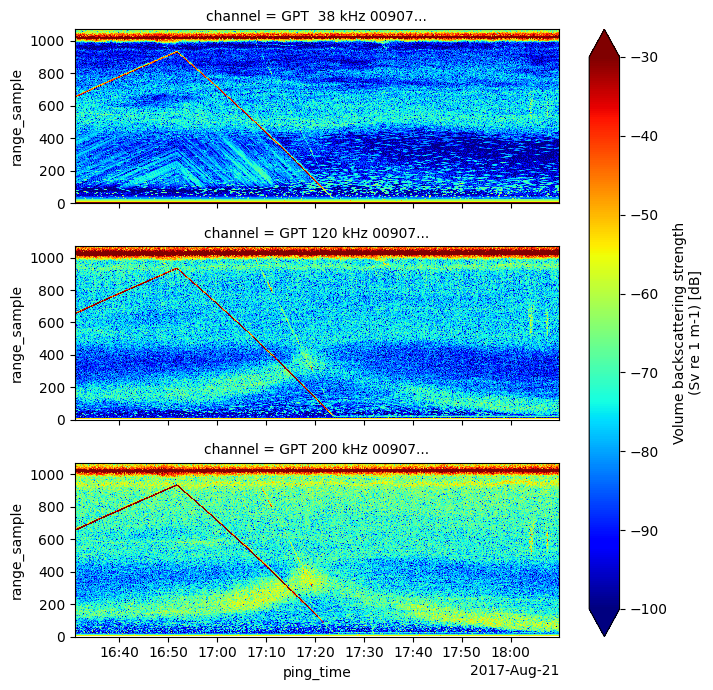

In [2]:
# Plot all 3 channels for inspection
ds_Sv["Sv"].plot(
    x="ping_time",
    row="channel",
    figsize=(7, 7),
    vmin=-100, 
    vmax=-30,
    cmap="jet"
)

Note that by default the vertical axis is shown as `range_sample`, which is one of the coordinates the Sv data array is aligned with.

In this case, since we know that the bin sizes are the same across pings, we can use the range (in meters) of the first ping to plot the vertical axis of the echograms.

In [3]:
ds_Sv = (
    ds_Sv.assign_coords(
        {"range": ("range_sample", ds_Sv["echo_range"].isel(ping_time=0, channel=0).data)}
    )  # use first ping range
    .swap_dims({"range_sample": "range"})  # swap the dimension
)
ds_Sv["range"] = ds_Sv["range"].assign_attrs(
    {"long_name": "range", "units": "meter"}
)

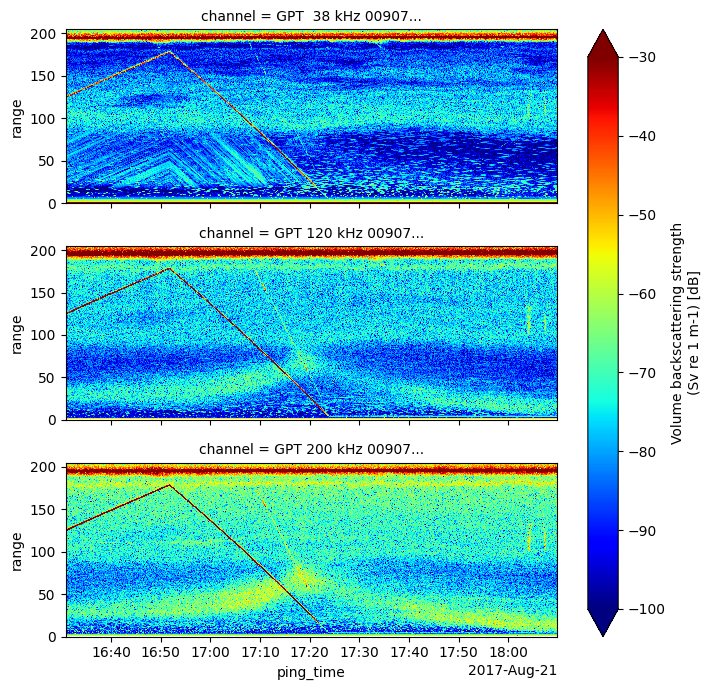

In [4]:
# Plot all 3 channels for inspection
ds_Sv["Sv"].plot(
    x="ping_time",
    row="channel",
    figsize=(7, 7),
    vmin=-100, 
    vmax=-30,
    cmap="jet",
)

## Use a custom colormap

The `colormap` subpackage provides a custom `EK500` colormap that is widely used fisheries acoustics echogram visualization. We plan to add other colormaps into this subpackage in the near future.

In [5]:
import echopype.colormap  # make custom colormap available

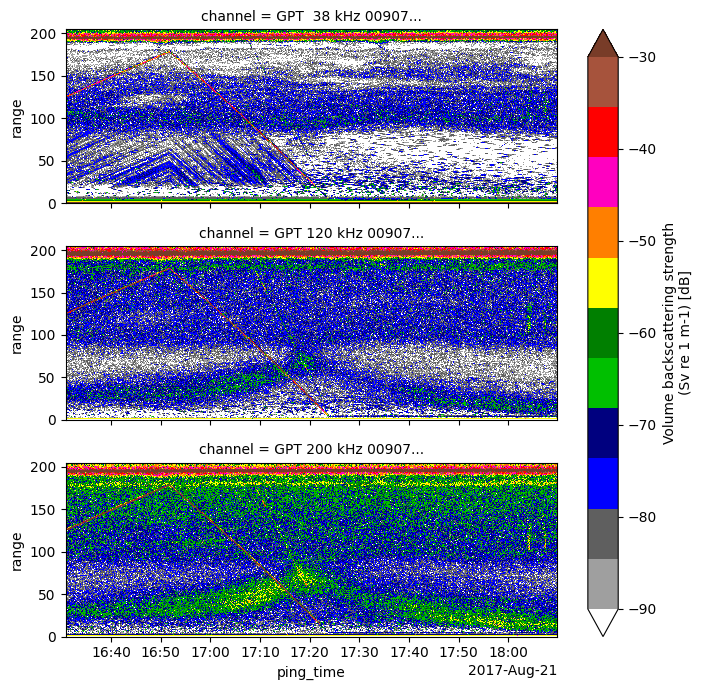

In [6]:
# Plot all 3 channels for inspection
ds_Sv["Sv"].plot(
    x="ping_time",
    row="channel",
    figsize=(7, 7),
    vmin=-90, 
    vmax=-30,
    cmap="ep.ek500"  # use the custom EK500 colormap
)

Comparing the `Jet` and `EK500` colormap, you can see that certain echogram features stand out more with `EK500`. However, However, be careful with rainbow colormaps because our perception of different colors can often skew what we think is the most prominent features in an echogram..

For good analyses of echogram colormaps, check out these very interesting articles!
- Blackwell et al. (2019). Colour maps for fisheries acoustic echograms. {cite:p}`Blackwell2019`
- Peña. (2023). Full customization of color maps for fisheries acoustics: Visualizing every target. {cite:p}`Pena2021`